# Predicting Shark Attacks - WORK IN PROGRESS

This project will attempt to build a model that will be able to predict shark attacks based on various oceanic, astrological, meteorological, and marine life factors. 

## Data

The data used for modeling was obtained from [Kaggle](https://www.kaggle.com/dingo1694/shark-attack) and contains values collected mainly from North and South Carolina Beaches. It is important to note that 61% of the location data is Null, while the remaining 39% indicate the data was collected from the Carolinas. Because this dataset is small, this project worked under the assumption that all data was collected from this region to maintain as much data as possible.

The [Global Shark Attack File](https://www.sharkattackfile.net/incidentlog.htm) was obtained from the [Shark Research Institute](https://www.sharks.org/), an organization dedicated to "inform[ing] and guid[ing] governing bodies and society at large to conservation policies that ensure the sustainability of all shark species." This file contains roughly 4600 reported shark attacks dating back to the mid-1800's. While it does not contain the same oceanic, astrological, meteorological, or marine life measures, it does include location data, activity of the victim, and whether or not the shark was provoked. This data was used to help inform data analysis and model development.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# YOLO
import warnings
warnings.filterwarnings('ignore')

### Load Kaggle Shark Attack Data

**Encountered a UTF-8 ecoding error. The suggestions in this discussion resolved the issue:** https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

In [2]:
data = pd.read_csv('sharks.csv', encoding='ISO-8859-1')
print(data.shape)
data.head()

(186, 72)


,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,1,1,4,5/4/09,25,0.0,Low,0.0,0,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,2,2,5,5/5/09,33,0.0,Low,0.0,0,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,3,3,7,5/7/09,49,1.0,Low,0.0,0,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,4,4,8,5/8/09,57,0.0,Low,0.0,0,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,5,5,11,5/11/09,81,2.0,Low,0.0,1,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [3]:
data.describe()

,X.2,X.1,X,Id,ID,TurtleExactCountSC,TurtleExactCountNC,TurtleExactCombined,TurtleAttackActivity,Precipitation_Value,...,Dissolved02_Normalised,Precipitation_minmax,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax
count,186.000000,186.000000,186.000000,186.000000,186.000000,151.000000,149.000000,186.000000,72.000000,182.000000,...,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,93.500000,93.500000,93.500000,414.188172,564.478495,40.920530,13.328859,32.596774,1.902778,0.133187,...,-2.688170e-11,0.039263,0.585550,0.345562,0.711591,0.055815,0.602410,0.738559,0.155965,0.517139
std,53.837719,53.837719,53.837719,362.030881,314.838856,48.536519,15.538724,41.343829,3.849857,0.392210,...,1.000000e+00,0.111143,0.193562,0.205506,0.164330,0.109588,0.154746,0.174951,0.197817,0.304463
min,1.000000,1.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.892896e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,47.250000,47.250000,145.000000,337.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-2.537028e-01,0.000000,0.473684,0.196078,0.601342,0.012498,0.563150,0.646205,0.004785,0.244974
50%,93.500000,93.500000,93.500000,277.500000,510.000000,23.000000,7.000000,19.500000,0.000000,0.000000,...,1.799387e-01,0.000000,0.596491,0.313725,0.733726,0.020990,0.630255,0.768977,0.093301,0.503497
75%,139.750000,139.750000,139.750000,633.750000,851.750000,67.500000,22.000000,46.750000,1.250000,0.057500,...,5.379092e-01,0.020000,0.719298,0.450980,0.830963,0.050026,0.685649,0.874794,0.223684,0.793706
max,186.000000,186.000000,186.000000,1167.000000,1148.000000,209.000000,54.000000,209.000000,19.000000,3.500000,...,2.569308e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 72 columns):
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                               60 non-null object
Species                

In [5]:
# Check for null values
data.isna().sum()

X.2                                  0
X.1                                  0
X                                    0
Id                                   0
Date                                 0
ID                                   0
TurtleExactCountSC                  35
turtleexactdiscretizeSC             35
TurtleExactCountNC                  37
TurtleExactCombined                  0
TurtleexactdiscretizeNC             37
TurtleAttackActivity               114
TurtleAttackActivityDiscretized    114
Area                               114
Location                           114
Time                               126
Species                            134
Attack                               0
Timeofattack                       114
Beach                              114
County                             114
MoonPhaseExtended                    0
MoonPhase                            0
Precipitation_Value                  4
StationPressure                      4
WindSpeed                

In [6]:
# Drop columns 1-17 as they contain significant null values or are redundant 
drop_cols = []
for name in data.columns[1:17]:
    drop_cols.append(name)

data1 = data.drop(drop_cols, axis=1)
data1.head()

,X.2,Attack,Timeofattack,Beach,County,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,No,NaN,NaN,NaN,First quarter,First quarter,0.00,29.96,6.4,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,No,NaN,NaN,NaN,Waxing gibbous,First quarter,0.19,30.00,4.4,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,No,NaN,NaN,NaN,Full,Waxing gibbous,0.00,29.92,7.5,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,No,NaN,NaN,NaN,Full,Waxing gibbous,0.00,29.92,5.4,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,No,NaN,NaN,NaN,Full,Full,0.00,29.98,7.2,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [7]:
# check results
data1.isna().sum()

X.2                             0
Attack                          0
Timeofattack                  114
Beach                         114
County                        114
MoonPhaseExtended               0
MoonPhase                       0
Precipitation_Value             4
StationPressure                 4
WindSpeed                       4
Salinity                        4
Turbidity                       4
Temperature                     4
DissovedO2                      4
PrecipitationValueMod           0
StationPressureMod              0
WindSpeedMod                    0
SalinityMod                     0
TurbidityMod                    0
TemperatureMod                  0
DissovedO2Mod                   0
DissolvedO2discretize           0
salinitydiscretize              0
turbiditydiscretize             0
temperaturediscretize           0
precipitationdiscretize         0
pressurediscretize              0
windspeeddiscretize             0
prepmovingaverage               0
precipitationm

In [8]:
# Drop additional columns that contain significant number of null values
data2 = data1.drop(['Timeofattack', 'Beach', 'County'], axis=1)
data2.head()

,X.2,Attack,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,No,First quarter,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,No,Waxing gibbous,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,No,Full,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,No,Full,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,No,Full,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [9]:
# check results
data2.isna().sum()

X.2                           0
Attack                        0
MoonPhaseExtended             0
MoonPhase                     0
Precipitation_Value           4
StationPressure               4
WindSpeed                     4
Salinity                      4
Turbidity                     4
Temperature                   4
DissovedO2                    4
PrecipitationValueMod         0
StationPressureMod            0
WindSpeedMod                  0
SalinityMod                   0
TurbidityMod                  0
TemperatureMod                0
DissovedO2Mod                 0
DissolvedO2discretize         0
salinitydiscretize            0
turbiditydiscretize           0
temperaturediscretize         0
precipitationdiscretize       0
pressurediscretize            0
windspeeddiscretize           0
prepmovingaverage             0
precipitationmvadiscretize    0
CrabLandings                  0
CrabLandingsnormalised        0
CrabLandingsDisc              0
Degree                        0
Directio

In [10]:
# Drop rows containing null values
data_fin = data2.dropna(axis=0)
data_fin.head()

,X.2,Attack,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,No,First quarter,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,No,Waxing gibbous,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,No,Full,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,No,Full,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,No,Full,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [11]:
# Check results
data_fin.isna().sum()

X.2                           0
Attack                        0
MoonPhaseExtended             0
MoonPhase                     0
Precipitation_Value           0
StationPressure               0
WindSpeed                     0
Salinity                      0
Turbidity                     0
Temperature                   0
DissovedO2                    0
PrecipitationValueMod         0
StationPressureMod            0
WindSpeedMod                  0
SalinityMod                   0
TurbidityMod                  0
TemperatureMod                0
DissovedO2Mod                 0
DissolvedO2discretize         0
salinitydiscretize            0
turbiditydiscretize           0
temperaturediscretize         0
precipitationdiscretize       0
pressurediscretize            0
windspeeddiscretize           0
prepmovingaverage             0
precipitationmvadiscretize    0
CrabLandings                  0
CrabLandingsnormalised        0
CrabLandingsDisc              0
Degree                        0
Directio

Many of the columns have names that suggest they underwent some sort of mathematical transformation. The source of this data does not indicate who performed these transformations or how they were transformed. For this reason, the data contained in these columns will be discarded.

In [12]:
# Create df containing raw value columns
data_raw = data_fin[['Attack','MoonPhase','Precipitation_Value','StationPressure','WindSpeed',
                     'Salinity','Turbidity','Temperature','DissovedO2', 'CrabLandings', 'Degree', 'Direction']]
print(data_raw.shape)
data_raw.head()

(182, 12)


,Attack,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,CrabLandings,Degree,Direction
0,No,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,1070,223.355556,SW
1,No,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,133,206.222222,SSW
2,No,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,1061,212.111111,SSW
3,No,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,341,222.977778,SW
4,No,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,1140,34.022222,NE


In [13]:
# Binarize target column
data_raw.loc[(data_raw.Attack == 'No'), 'Attack'] = 0
data_raw.loc[(data_raw.Attack == 'Yes'), 'Attack'] = 1
print(data_raw.Attack.value_counts())
data_raw.head()

0    114
1     68
Name: Attack, dtype: int64


,Attack,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,CrabLandings,Degree,Direction
0,0,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,1070,223.355556,SW
1,0,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,133,206.222222,SSW
2,0,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,1061,212.111111,SSW
3,0,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,341,222.977778,SW
4,0,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,1140,34.022222,NE


### Load Global Shark Attack File

While this dataset is maintained by the Shark Research Institute, it is fairly messy. There are a significant amount of Null values and there is inconsistent data types within the columns. Considerable preprocessing will be necessary before the dataset is usable for analysis.

Preprocessing Tasks:
* Drop the last 19,000 as they are comprised of only Null values
* 

In [114]:
gsaf.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Case Number.1', 'Case Number.2'],
      dtype='object')

In [115]:
gsaf = pd.read_excel("GSAF5.xls", nrows=6451)
gsaf = gsaf.drop(['Investigator or Source', 'pdf', 'href formula', 'href', 'original order', 'Case Number.1', 
                  'Case Number.2','Unnamed: 22', 'Unnamed: 23'], axis=1)
#gsaf['Date'] = pd.to_datetime(gsaf['Date'])
gsaf.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,40,Hand and calf bitten when he jumped off surfbo...,N,11h55,6.5' shark
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,11,Foot bitten,N,09h00,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,26,Injury to lower back and right hip,N,08h00,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,9,Puncture marks to lower leg,N,11h00,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,16,"No injury, board damaged",N,19h30,10' to 12' shark


In [116]:
gsaf['Case Number'] = gsaf['Case Number'].astype('str')

In [124]:
gsaf[gsaf['Case Number'].str.contains(',')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
3940,"1962,08.30.b",30-Aug-1962,1962.0,Watercraft,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,NaN,No injury,N,NaN,NaN
6159,"1853,94.29",29-Apr-1853,1853.0,Unprovoked,GREECE,Corfu,NaN,Swimming,Hanson,M,NaN,Leg severed at knee,N,NaN,234-lb shark


In [142]:
gsaf.iloc[530]

Case Number                                 2015.07-10
Date                                       10-Jul-2015
Year                                              2015
Type                                        Unprovoked
Country                                            USA
Area                                        California
Location               Huntington Beach, Orange County
Activity                                       Surfing
Name                                      Danny Miskin
Sex                                                  M
Age                                                 38
Injury         No injury, shark bumped & damaged board
Fatal (Y/N)                                          N
Time                                             08h45
Species                                White shark, 7'
test                                        2015.07-10
Name: 530, dtype: object

In [243]:
gsaf.set_value(3940, 'Case Number', '1962.08.30')
gsaf.set_value(6159, 'Case Number', '1853.04.29')
gsaf.set_value(530, 'Case Number', '2015.07.10')
gsaf.set_value(1021, 'Case Number', '2011.08.17')
gsaf.set_value(1022, 'Case Number', '2011.08.17')
gsaf.set_value(1486, 'Case Number', '2007.08.19')
gsaf.set_value(2491, 'test', '1995.08.26')
gsaf.set_value(2881, 'test', '1988.04.15')
gsaf.set_value(3508, 'test', '1971.04.16')
gsaf.set_value(4087, 'test', '1960.12.27')
gsaf.set_value(4230, 'test', '1959.07.03')
gsaf.set_value(4505, 'test', '1954.01.01')
gsaf.set_value(4583, 'test', '1951.09.02')
gsaf.iloc[4583]

Case Number                                         1951.09.02-R
Date                                        Reported 02-Sep-1951
Year                                                        1951
Type                                                  Unprovoked
Country                                                AUSTRALIA
Area                                                  Queensland
Location                          Fitzroy River near Rockhampton
Activity       Body found on deserted luxury yacht, 38’ Chris...
Name                                             Dr. E. Al Joske
Sex                                                            M
Age                                                           56
Injury         FATAL, abdominal wounds & right leg severed at...
Fatal (Y/N)                                                    Y
Time                                                         NaN
Species                                                      NaN
test                     

In [235]:
def clean_case_number(col):
    for i in range(6451):
        if col.startswith('ND'):
            return np.nan
        elif col.startswith('0'):
            return np.nan
#         elif col.endswith('.'):
#             return col[:-3]
        elif col.endswith('.00.00'):
            return col[:4] + ".01.01"
        elif col.endswith('.00'):
            return col[:7] + ".01"
        elif col.endswith('.R'):
            if col.endswith('.00.00.R'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.R'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.R1'):
            if col.endswith('.00.00.R1'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.R1'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.R2'):
            if col.endswith('.00.00.R2'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.R2'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.R '):
            if col.endswith('.00.00.R '):
                return col[:4] + ".01.01"
            elif col.endswith('.00.R '):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.R.'):
            if col.endswith('.00.00.R.'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.R.'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.a'):
            if col.endswith('.00.00.a'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.a'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.b'):
            if col.endswith('.00.00.b'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.b'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.c'):
            if col.endswith('.00.00.c'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.c'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.d'):
            if col.endswith('.00.00.d'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.d'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.e'):
            if col.endswith('.00.00.e'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.e'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.f'):
            if col.endswith('.00.00.f'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.f'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.g'):
            if col.endswith('.00.00.g'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.g'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith(' g'):
            if col.endswith('.00.00 g'):
                return col[:4] + ".01.01"
            elif col.endswith('.00 g'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.h'):
            if col.endswith('.00.00.h'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.h'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.i'):
            if col.endswith('.00.00.i'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.i'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.j'):
            if col.endswith('.00.00.j'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.j'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.k'):
            if col.endswith('.00.00.k'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.k'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        elif col.endswith('.x'):
            if col.endswith('.00.00.x'):
                return col[:4] + ".01.01"
            elif col.endswith('.00.x'):
                return col[:7] + ".01"
            else:
                return col[:-2]
        else:
            return col

In [236]:
gsaf['test'] = gsaf['Case Number'].apply(clean_case_number)
gsaf.iloc[3900:4000]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,test
3900,1963.04.13,13-Apr-1963,1963.0,Unprovoked,AUSTRALIA,Western Australia,Yallingup,"Surfing on ""chest board"" (boogie board?)",Brian Audas,M,25,Arm bitten,N,NaN,1.8 m to 2.4 m [6' to 8'] shark,1963.04.13
3901,1963.04.12,12-Apr-1963,1963.0,Unprovoked,USA,Hawaii,"Awili, South Kona, Hawai'i",Surfing,Aiona Aka,M,15,Left foot & leg bitten,N,14h00,3.7 to 4.5 m [12' to 15'] shark seen in vicinity,1963.04.12
3902,1963.04.08,08-Apr-1963,1963.0,Invalid,USA,Hawaii,"Hapuna Beach, Hawai'i",Washed into sea while picking opihi,Roy C. Kametani,M,NaN,"May have drowned prior to shark involvement, p...",NaN,NaN,Shark involvement prior to death was not confi...,1963.04.08
3903,1963.03.30,30-Mar-1963,1963.0,Sea Disaster,SOLOMON ISLANDS,Bougainville (North Solomons),NaN,The 500-ton coastal trader Polurrian foundered,"Daniel Viva, missionary",M,NaN,FATAL,Y,Night,NaN,1963.03.30
3904,1963.02.27,27-Feb-1963,1963.0,Unprovoked,PAPUA NEW GUINEA,New Ireland Province,Namatanai,Swimming,Joseph To Toba,M,NaN,Right shoulder bitten,N,11h00,NaN,1963.02.27
3905,1963.02.24,24-Feb-1963,1963.0,Unprovoked,AUSTRALIA,New South Wales,Wombarra Beach near Austinmeer,Spearfishing,Charles Dunn,M,18,Left leg lacerated,N,Afternoon,"Bronze whaler shark, 3 m [10']",1963.02.24
3906,1963.02.08,08-Feb-1963,1963.0,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28,Left arm bitten,N,10h00,"White shark, 2.1 m [7']",1963.02.08
3907,1963.02.06,06-Feb-1963,1963.0,Unprovoked,MAURITIUS,Rodrigues,NaN,NaN,Irené Rose,M,24,Laceration to right forearm,N,NaN,NaN,1963.02.06
3908,1963.02.04,04-Feb-1963,1963.0,Invalid,USA,Florida,Off Key West,"S.S. Marine Sulphur Queen, laden with molten s...",2 males,M,NaN,Two shark-bitten lifejackets were recovered le...,NaN,NaN,Shark involvement prior to death was not confi...,1963.02.04
3909,1963.01.30,30-Jan-1963,1963.0,Unprovoked,FIJI,NaN,NaN,Freediving,Savenaca Kuruvakarua,M,41,Hand & arm severely lacerated,N,NaN,NaN,1963.01.30


In [248]:
gsaf['test'] = pd.to_datetime(gsaf.test)
gsaf.head()

In [242]:
gsaf[gsaf['Case Number'].str.contains('-R')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,test
4583,1951.09.02-R,Reported 02-Sep-1951,1951.0,Unprovoked,AUSTRALIA,Queensland,Fitzroy River near Rockhampton,"Body found on deserted luxury yacht, 38’ Chris...",Dr. E. Al Joske,M,56,"FATAL, abdominal wounds & right leg severed at...",Y,NaN,NaN,1951.09.02-R


In [227]:
gsaf[gsaf['Case Number'] == '1959.07.03.a & b']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,test
4230,1959.07.03.a & b,03-Jul-1959,1959.0,Sea Disaster,CARIBBEAN SEA,PANAMA,"Off Cristobal, 200 miles northeast of the entr...",Columbian petrol barge Rio Atrato burned and sank,Teresea Britton (on raft) & a man (on floating...,NaN,27,"FATAL X 2, 8 others missing. Survivors fought ...",Y,NaN,NaN,1959.07.03.a & b


In [249]:
gsaf.set_value(4230, 'test', '1959.07.03')

In [107]:
gsaf.iloc[3940]['test']

'1962.08.01'

In [245]:
gsaf1 = gsaf.dropna(axis=0)
gsaf1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,test
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,40,Hand and calf bitten when he jumped off surfbo...,N,11h55,6.5' shark,2019.08.27
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,16,"No injury, board damaged",N,19h30,10' to 12' shark,2019.08.11
14,2019.07.22,22-Jul-2019,2019.0,Unprovoked,USA,Rhode Island,"Moonstone Beach, South Kingstown, Washington C...",Surfing,Chase Clary,M,18,Foot bitten,N,18h30,Sandtiger shark,2019.07.22
16,2019.07.17.R,Reported 17-Jul-2019,2019.0,Unprovoked,NEW ZEALAND,Chatham Islands,Pitt Island or Chatham Island,Scuba diving,Val Croon,M,45,Shark rammed him but no injury,N,Morning,"White shark, 3m",2019.07.17
19,2019.07.10,10-Jul-2019,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"East Beach, Port Alfred",Surfing,Dusty Phelan,M,20's,Leg injured,N,10h30,"White shark, juvenile",2019.07.10


In [247]:
gsaf1['test'] = pd.to_datetime(gsaf1.test)
gsaf1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,test
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,40,Hand and calf bitten when he jumped off surfbo...,N,11h55,6.5' shark,2019-08-27
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,16,"No injury, board damaged",N,19h30,10' to 12' shark,2019-08-11
14,2019.07.22,22-Jul-2019,2019.0,Unprovoked,USA,Rhode Island,"Moonstone Beach, South Kingstown, Washington C...",Surfing,Chase Clary,M,18,Foot bitten,N,18h30,Sandtiger shark,2019-07-22
16,2019.07.17.R,Reported 17-Jul-2019,2019.0,Unprovoked,NEW ZEALAND,Chatham Islands,Pitt Island or Chatham Island,Scuba diving,Val Croon,M,45,Shark rammed him but no injury,N,Morning,"White shark, 3m",2019-07-17
19,2019.07.10,10-Jul-2019,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"East Beach, Port Alfred",Surfing,Dusty Phelan,M,20's,Leg injured,N,10h30,"White shark, juvenile",2019-07-10


# Exploratory Data Analysis

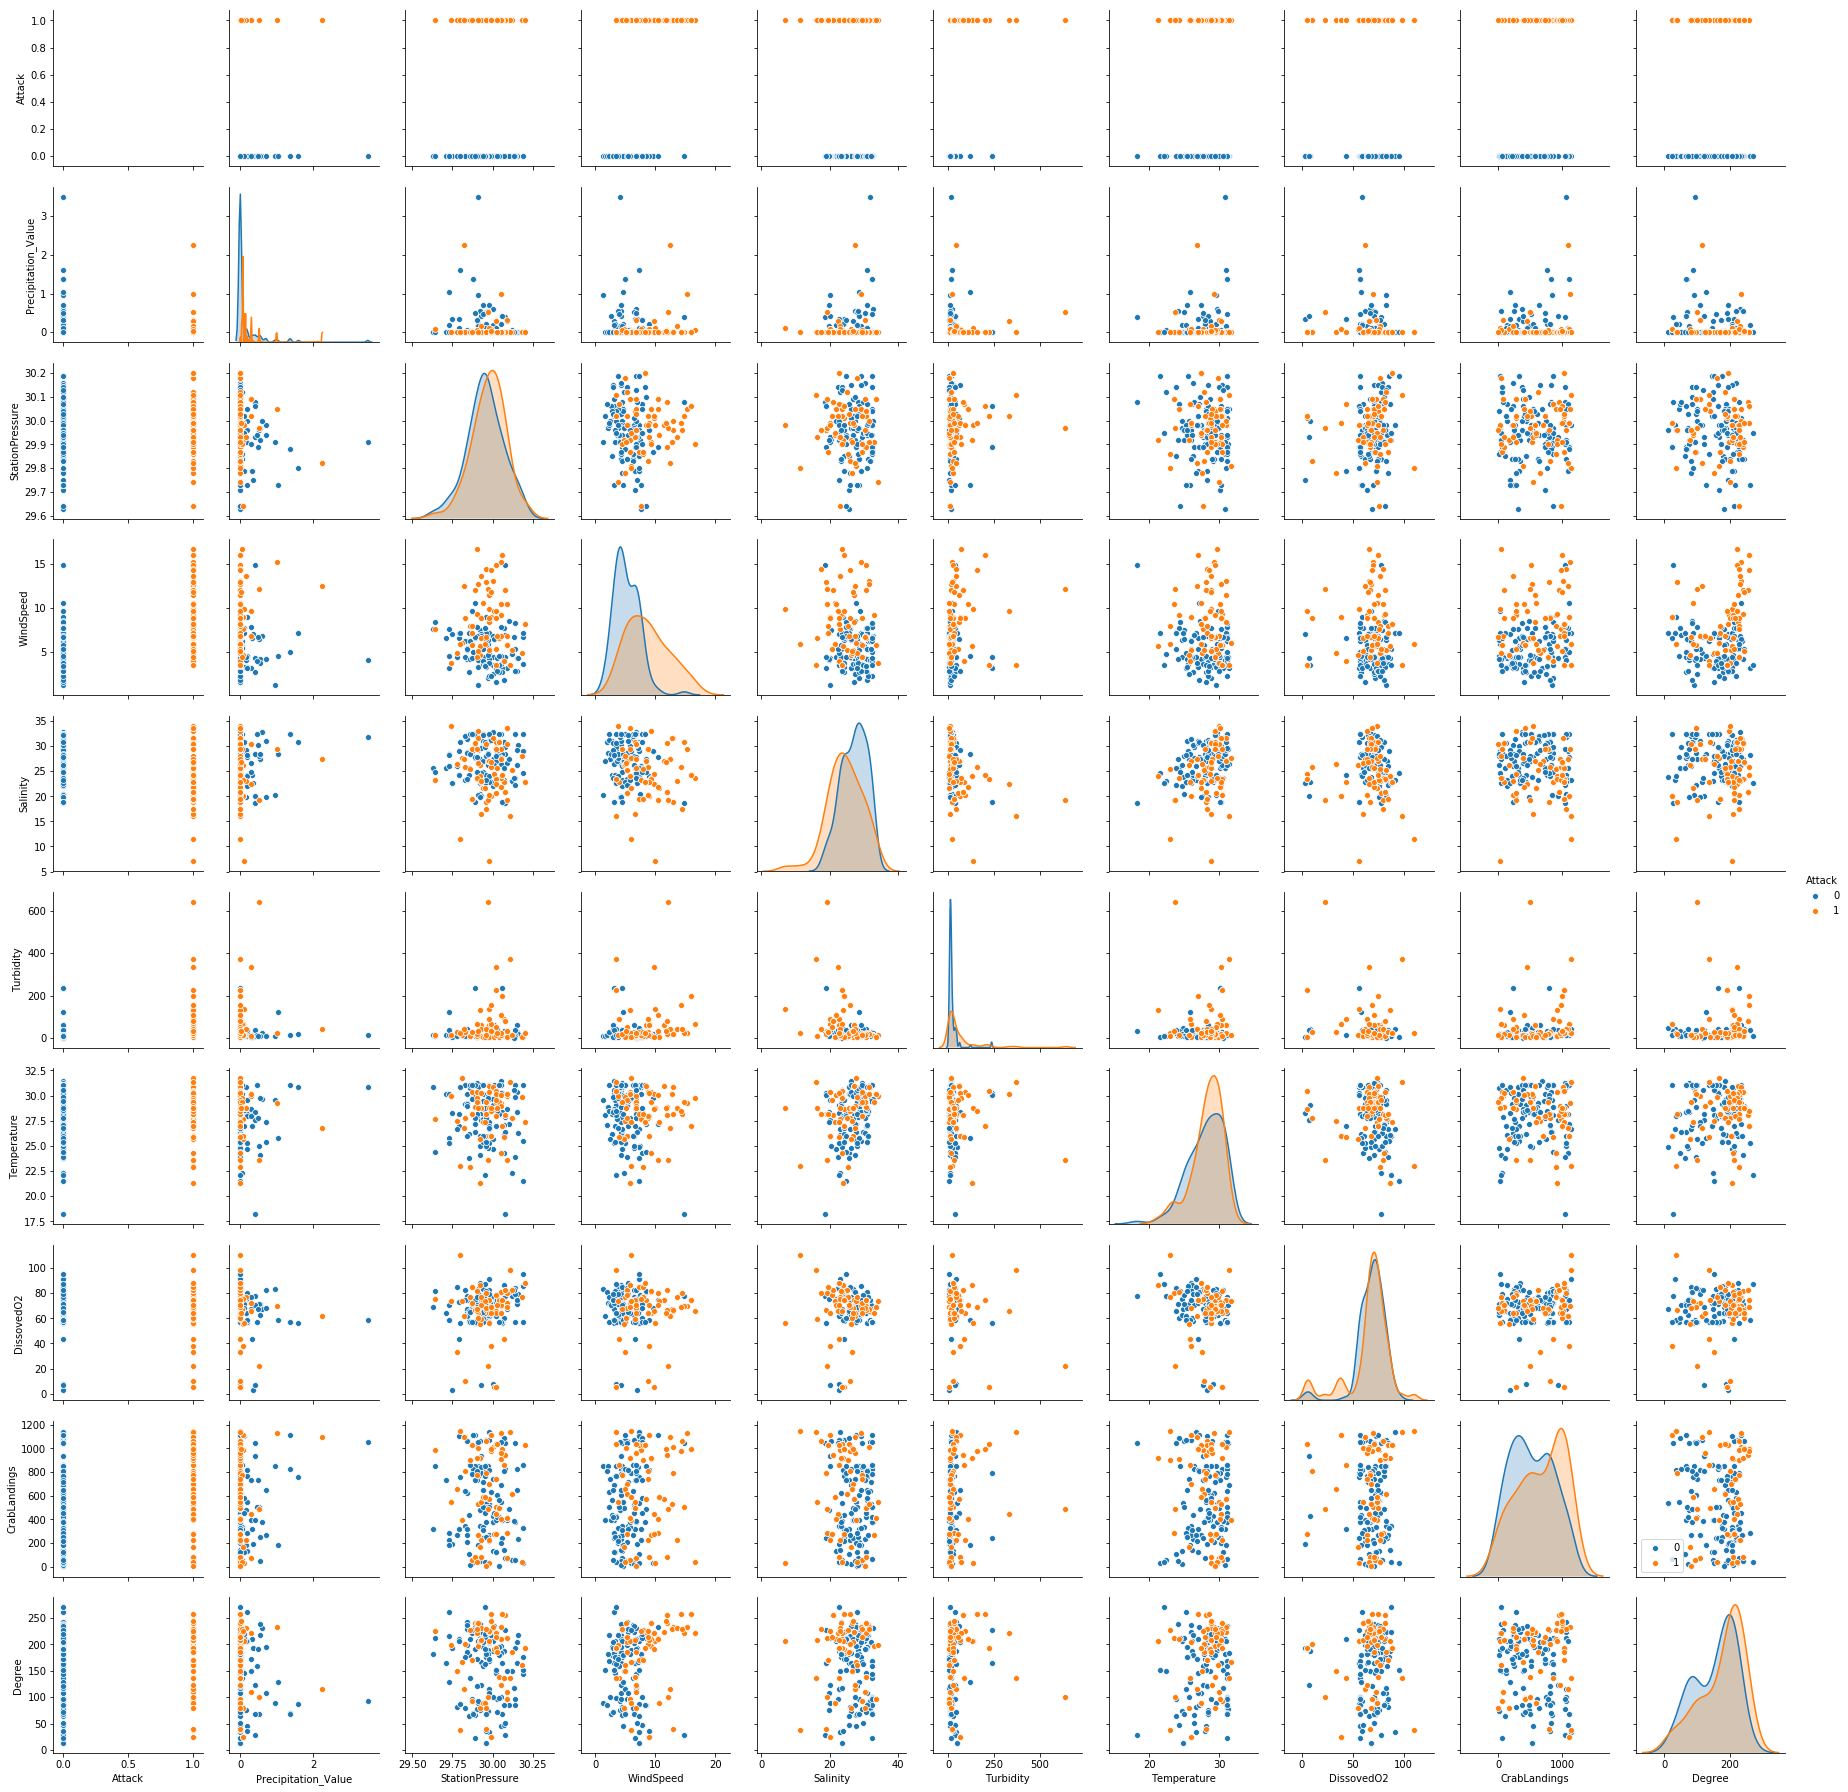

In [14]:
# Look for correlation with continuous variables
sns.pairplot(data_raw, hue='Attack')
plt.legend()
plt.show()

**Analysis:** Looking at the distribution plots that run along the diagonal of the scatterplot matrix, it does appear that shark attacks happen more frequently when wind speed and number of crab landings are higher and when salinity is lower. Additionally there doesn't appear to be strong evidence of correlation between the features (multicolinearity), but this will examined further with a heatmap in the next cell.

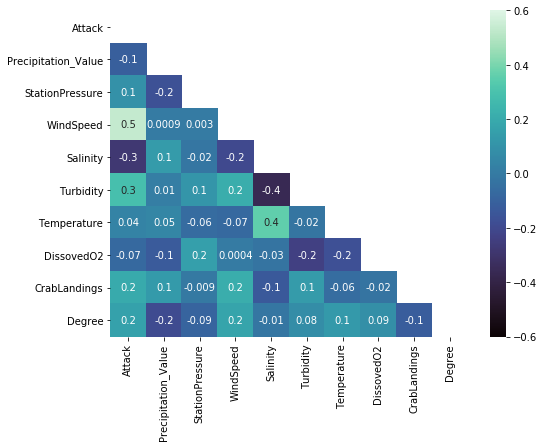

In [15]:
# Another check for correlation and multicollinearity
mask = np.zeros_like(data_raw.corr())
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(8,6))
sns.heatmap(data_raw.corr(), vmin=-.6, vmax=.6, mask=mask, cmap='mako', annot=True, fmt='.1g')
plt.show()

**Analysis:** Several features display moderate levels of correlation with the frequency of shark attacks. Wind speed shows the strongest positive correlation (0.5) with attacks, while salinity shows the strongest negative correlation (-0.3). These findings are in line with the conclusions drawn from the pairplot above. While it was difficult to determine from the pairplot, turbidity also shows a moderate positive correlation (0.3) with attacks when analyzed using this heatmap. Additionally, there does not appear to be strong evidence of multicolinearity as the strongest within-feature correlations are -0.4 (turbidity-salinity) and 0.4 (temperature-salinity). No action needs to be taken at this time to address multicolinearity as these interactions are moderate at best.

In [48]:
# print(plt.style.available)

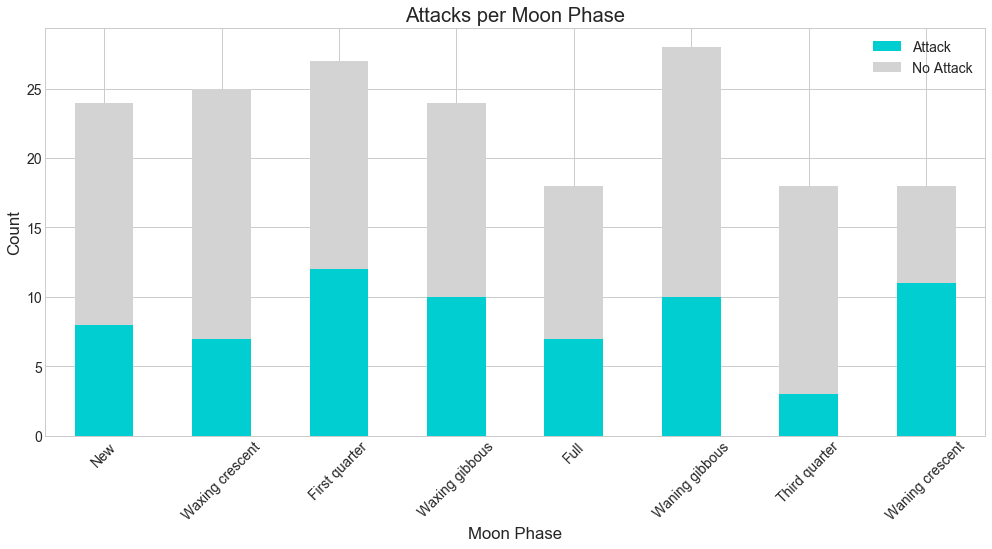

In [45]:
plt.style.use('seaborn-whitegrid')
# Look for trend in categorical variable - MoonPhase

attacks = data_raw[data_raw.Attack == 1]

moonphase = ['New', 'Waxing crescent', 'First quarter', 'Waxing gibbous', 'Full', 'Waning gibbous', 'Third quarter', 
            'Waning crescent']

moon_total = []
moon_attack = []
for phase in moonphase:
    total_phase = len(data_raw[data_raw.MoonPhase == phase])
    attack_phase = len(attacks[attacks.MoonPhase == phase])
    moon_attack.append(attack_phase)
    moon_total.append(total_phase-attack_phase)
        
moon_freq_df = pd.DataFrame(np.array([moon_attack, moon_total]))
moon_freq_df.columns = moonphase
moon_freq_df.index = ['Attack', 'No Attack']


moon_freq_df.T.plot(kind='bar', stacked=True, colors=['darkturquoise', 'lightgrey'], figsize=(15,7), 
                    title='Attacks per Moon Phase')
plt.xlabel('Moon Phase')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


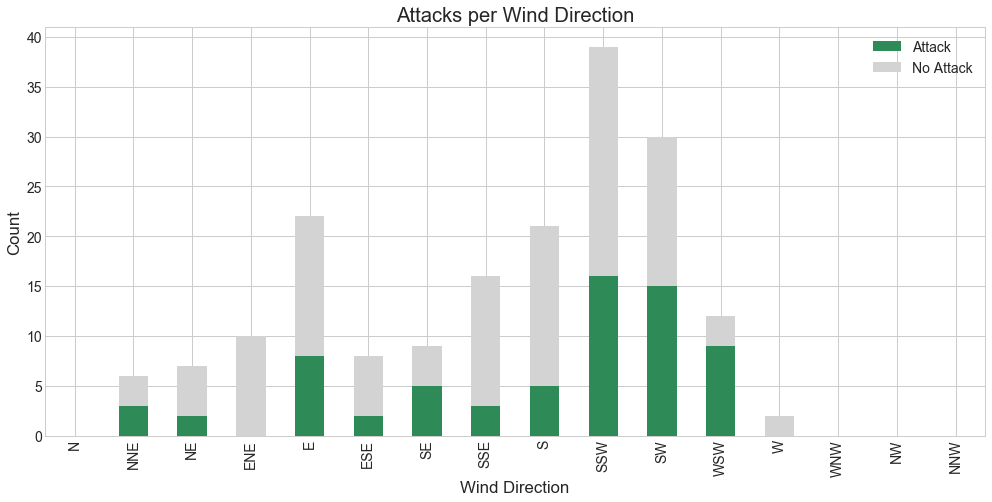

In [47]:
# Look for trend in categorical variable - Wind Direction

directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

wind_total = []
wind_attack = []
for wind in directions:
    total_wind = len(data_raw[data_raw.Direction == wind])
    attack_wind = len(attacks[attacks.Direction == wind])
    wind_attack.append(attack_wind)
    wind_total.append(total_wind-attack_wind)
        
wind_freq_df = pd.DataFrame(np.array([wind_attack, wind_total]))
wind_freq_df.columns = directions
wind_freq_df.index = ['Attack', 'No Attack']


wind_freq_df.T.plot(kind='bar', stacked=True, colors=['seagreen', 'lightgrey'], figsize=(15,7), 
                    title='Attacks per Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

# Modeling

The goal of this section will be to determine which machine learning model performs the best at predicting shark attacks. The evaluation metrics used to determine which model is "best" will be based on: accuracy, F1 score, and ROC-AUC measures. The models tested will be: naive bayes, logistic regression, random forest, adaboost, gradient boosting. k-nearest, svc, and xgboost.

In [66]:
# Isolate target and features
y = data_raw.Attack
x1 = data_raw.drop(['Attack'], axis=1)
x2 = data_raw.drop(['Attack', 'MoonPhase', 'Direction'], axis=1) # Consider binning CrabLandings

In [67]:
# Import packages for preprocessing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Scale the features with MinMax to bring all values in the range [0,1]
min_max = MinMaxScaler()

minmax_x = pd.DataFrame(min_max.fit_transform(x2), columns=x2.columns)
minmax_x.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,CrabLandings,Degree
0,0.000000,0.578947,0.333333,0.636021,0.032566,0.576733,0.741354,0.933566,0.819105
1,0.054286,0.649123,0.202614,0.552312,0.037936,0.477558,0.675088,0.114510,0.752212
2,0.000000,0.508772,0.405229,0.496314,0.027615,0.498185,0.703665,0.925699,0.775204
3,0.000000,0.508772,0.267974,0.579198,0.020119,0.575743,0.788776,0.296329,0.817630
4,0.000000,0.614035,0.385621,0.597837,0.066004,0.627393,0.822323,0.994755,0.079906


In [69]:
# Encode the categorical variables with labels
labeler = LabelEncoder()

labeled_moon = pd.Series(labeler.fit_transform(x1['MoonPhase']), name='MoonPhase', dtype='category')
labeled_wind = pd.Series(labeler.fit_transform(x1['Direction']), name='Direction', dtype='category')

final_x = pd.concat([minmax_x, labeled_moon, labeled_wind], axis=1)
final_x.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,CrabLandings,Degree,MoonPhase,Direction
0,0.000000,0.578947,0.333333,0.636021,0.032566,0.576733,0.741354,0.933566,0.819105,0,9
1,0.054286,0.649123,0.202614,0.552312,0.037936,0.477558,0.675088,0.114510,0.752212,0,8
2,0.000000,0.508772,0.405229,0.496314,0.027615,0.498185,0.703665,0.925699,0.775204,7,8
3,0.000000,0.508772,0.267974,0.579198,0.020119,0.575743,0.788776,0.296329,0.817630,7,9
4,0.000000,0.614035,0.385621,0.597837,0.066004,0.627393,0.822323,0.994755,0.079906,1,3


In [70]:
final_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):
Precipitation_Value    182 non-null float64
StationPressure        182 non-null float64
WindSpeed              182 non-null float64
Salinity               182 non-null float64
Turbidity              182 non-null float64
Temperature            182 non-null float64
DissovedO2             182 non-null float64
CrabLandings           182 non-null float64
Degree                 182 non-null float64
MoonPhase              182 non-null category
Direction              182 non-null category
dtypes: category(2), float64(9)
memory usage: 14.0 KB


In [71]:
# Import modeling and evaluation packages
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

In [183]:
def model_assessment(model, n):
    """
    Function to calculate accuracy, f1-score, and AUC eval metrics for an SciKit Learn model over a specified number 
    of iterations.
    
    Input:
    model - tupel in the form of (instantiated_model_variable, alias_string)
    n - the number of times to run the model; integer
    
    Return:
    pandas dataframe containing eval metrics from the training and testing sets over n iterations
    
    """
    
    # Create empty lists to house eval metrics
    acc_train = []
    acc_test = []
    f1_train = []
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []
    
    # isolate the string alias of the model
    model_name = model[1]
    
    # fit the model n number of times and record eval metrics for each iteration
    for i in range(n):
        
        # split the data into train and test sets. DO NOT set random seed to allow for variability
        X_train, X_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2)
        
        # fit the model and generate predictions for the train and test sets
        model[0].fit(X_train, y_train)
        train_preds = model[0].predict(X_train)
        test_preds = model[0].predict(X_test)
        
        # calculate accuracy scores for train and test sets
        train_acc = accuracy_score(y_train, train_preds)
        acc_train.append(train_acc)
        test_acc = accuracy_score(y_test, test_preds)
        acc_test.append(test_acc)
        
        # calculate f1-scores for train and test sets
        train_f1 = f1_score(y_train, train_preds)
        f1_train.append(train_f1)
        test_f1 = f1_score(y_test, test_preds)
        f1_test.append(test_f1)
        
        # calculate auc for train and test sets
        train_roc_auc = roc_auc_score(y_train, train_preds)
        roc_auc_train.append(train_roc_auc)
        test_roc_auc = roc_auc_score(y_test, test_preds)
        roc_auc_test.append(test_roc_auc)
    
    # return df with eval metrics for all iterations
    return pd.DataFrame(np.array([acc_train, acc_test, f1_train, f1_test, roc_auc_train, roc_auc_test]).T, 
                        columns=[model_name+'_Training_Acc',model_name+'_Testing_Acc',model_name+'_Training_F1', 
                                 model_name+'_Testing_F1', model_name+'_Training_AUC', model_name+'_Testing_AUC'])

In [184]:
# Instantiate models
naive_bayes = GaussianNB()
logistic = LogisticRegression()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svc = SVC()

# Create list of models and name alias
models = [(naive_bayes, 'naive_bayes'), (logistic, 'logistic'), (random_forest, 'random_forest'), 
          (adaboost, 'adaboost'), (gradient_boost, 'gradient_boost'), (knn, 'knn'), (svc, 'svc')]

In [185]:
# Iterate through the list of models and combine dfs to get single baseline df
df = []
for mod in models:
    df.append(model_assessment(mod, 1000)) # perform 1000 iterations
    
baseline_df = pd.concat(df, axis=1)
baseline_df.head()

,naive_bayes_Training_Acc,naive_bayes_Testing_Acc,naive_bayes_Training_F1,naive_bayes_Testing_F1,naive_bayes_Training_AUC,naive_bayes_Testing_AUC,logistic_Training_Acc,logistic_Testing_Acc,logistic_Training_F1,logistic_Testing_F1,...,knn_Training_F1,knn_Testing_F1,knn_Training_AUC,knn_Testing_AUC,svc_Training_Acc,svc_Testing_Acc,svc_Training_F1,svc_Testing_F1,svc_Training_AUC,svc_Testing_AUC
0,0.813793,0.756757,0.703297,0.666667,0.770058,0.733631,0.813793,0.783784,0.682353,0.666667,...,0.720000,0.300000,0.777273,0.532051,0.682759,0.702703,0.394737,0.266667,0.605839,0.563333
1,0.813793,0.783784,0.721649,0.600000,0.780118,0.714286,0.786207,0.891892,0.673684,0.777778,...,0.630435,0.400000,0.719237,0.553030,0.682759,0.810811,0.439024,0.363636,0.629684,0.609524
2,0.827586,0.783784,0.752475,0.600000,0.799242,0.715035,0.793103,0.756757,0.651163,0.666667,...,0.701031,0.384615,0.766407,0.530303,0.710345,0.675676,0.382353,0.333333,0.611772,0.600000
3,0.862069,0.702703,0.782609,0.592593,0.823318,0.675758,0.820690,0.702703,0.697674,0.560000,...,0.674699,0.320000,0.755584,0.570588,0.682759,0.594595,0.233333,0.000000,0.566038,0.500000
4,0.834483,0.702703,0.739130,0.560000,0.794665,0.671131,0.827586,0.756757,0.742268,0.608696,...,0.637363,0.560000,0.725083,0.671131,0.689655,0.648649,0.262295,0.315789,0.571547,0.593750


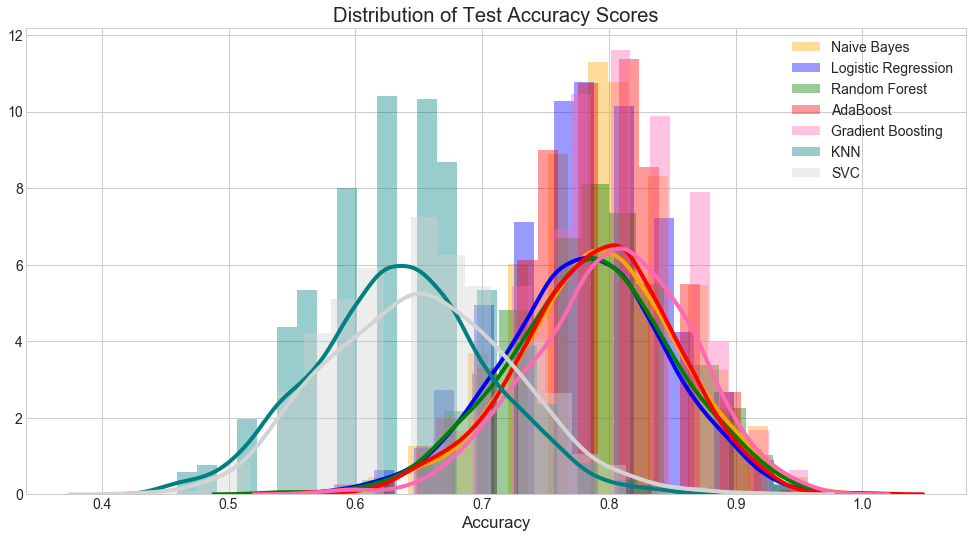

In [186]:
# Plot distribution of accuracy scores for each model evaluated on the testing set

fig = plt.figure(figsize=(15,8))

sns.distplot(baseline_df['naive_bayes_Testing_Acc'], color='orange', label='Naive Bayes')
sns.distplot(baseline_df['logistic_Testing_Acc'], color='blue', label='Logistic Regression')
sns.distplot(baseline_df['random_forest_Testing_Acc'], color='green', label='Random Forest')
sns.distplot(baseline_df['adaboost_Testing_Acc'], color='red', label='AdaBoost')
sns.distplot(baseline_df['gradient_boost_Testing_Acc'], color='hotpink', label='Gradient Boosting')
sns.distplot(baseline_df['knn_Testing_Acc'], color='teal', label='KNN')
sns.distplot(baseline_df['svc_Testing_Acc'], color='lightgrey', label='SVC')
plt.xlabel('Accuracy')
plt.title('Distribution of Test Accuracy Scores')
plt.legend()
plt.show()

**Analysis:** The distribution of accuracy scores for the models evaluated on the testing set indicate that the KNN and SVC models performed the worst as their distributions are shifted to the left of the other distributions. The other five distributions (naive bayes, logistic regression, random forest, adaboost, and gradient boosting) are clustered relatively tightly, but the ditribution for gradient boosting does appear to be shifted the furthest right, indicating its accuracy scores were the highest.

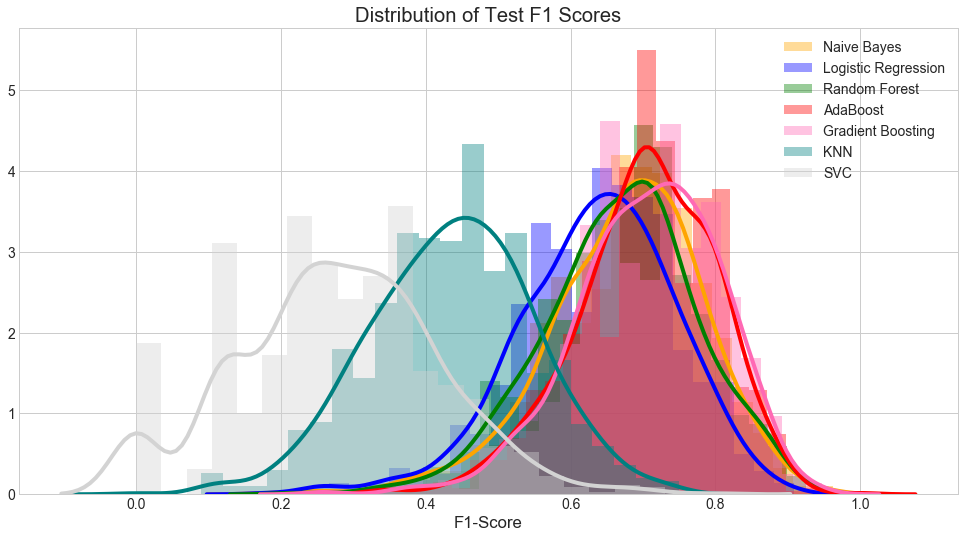

In [187]:
# Plot distribution of f1-scores for each model evaluated on the testing set

fig = plt.figure(figsize=(15,8))

sns.distplot(baseline_df['naive_bayes_Testing_F1'], color='orange', label='Naive Bayes')
sns.distplot(baseline_df['logistic_Testing_F1'], color='blue', label='Logistic Regression')
sns.distplot(baseline_df['random_forest_Testing_F1'], color='green', label='Random Forest')
sns.distplot(baseline_df['adaboost_Testing_F1'], color='red', label='AdaBoost')
sns.distplot(baseline_df['gradient_boost_Testing_F1'], color='hotpink', label='Gradient Boosting')
sns.distplot(baseline_df['knn_Testing_F1'], color='teal', label='KNN')
sns.distplot(baseline_df['svc_Testing_F1'], color='lightgrey', label='SVC')
plt.xlabel('F1-Score')
plt.title('Distribution of Test F1 Scores')
plt.legend()
plt.show()

**Analysis:** A model's F1-Score is indicative of its overall performance as high precision and recall scores are needed for a high F1-Score. The positions of the distributions again suggest that the KNN and SVC models performed the worst on the classification task as their distributions are the fursthest to the left. Again the other five distributions are clustered together with means around 0.65, with the distribution for the gradient boosting model located furthest to the right, indicating it produced the strongest F1-Score.

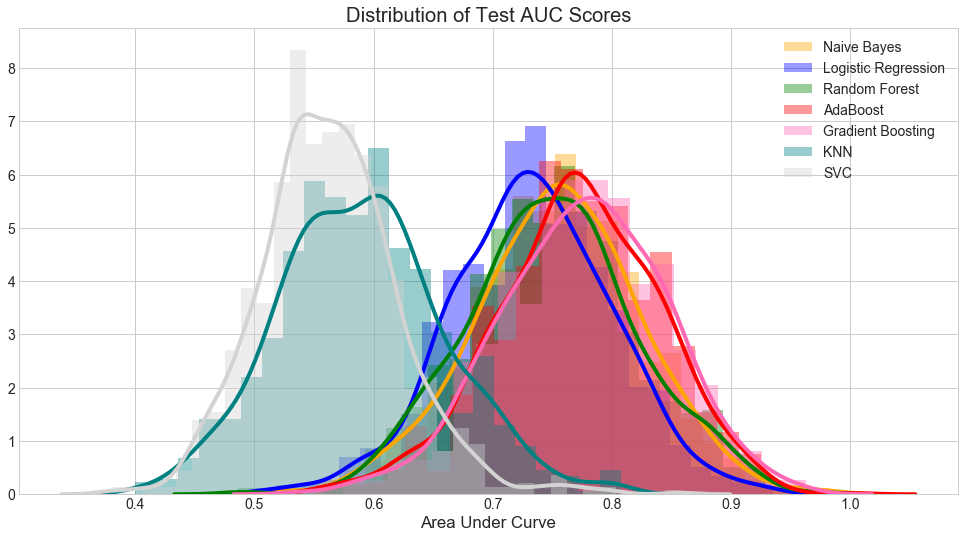

In [188]:
# Plot distribution of AUC scores for each model evaluated on the testing set

fig = plt.figure(figsize=(15,8))

sns.distplot(baseline_df['naive_bayes_Testing_AUC'], color='orange', label='Naive Bayes')
sns.distplot(baseline_df['logistic_Testing_AUC'], color='blue', label='Logistic Regression')
sns.distplot(baseline_df['random_forest_Testing_AUC'], color='green', label='Random Forest')
sns.distplot(baseline_df['adaboost_Testing_AUC'], color='red', label='AdaBoost')
sns.distplot(baseline_df['gradient_boost_Testing_AUC'], color='hotpink', label='Gradient Boosting')
sns.distplot(baseline_df['knn_Testing_AUC'], color='teal', label='KNN')
sns.distplot(baseline_df['svc_Testing_AUC'], color='lightgrey', label='SVC')
plt.xlabel('Area Under Curve')
plt.title('Distribution of Test AUC Scores')
plt.legend()
plt.show()

**Analysis:** The AUC evaluation metric is another comprehensive measure of model performance like the F1-Score. The AUC refers to the area under the ROC curve. The ROC curve is a measure of the model's true positive rate versus its true negative rate. In simplest terms, AUC can be thought of as a measure of how well the model separated the two classes in the data. An AUC of 1 means the model classified every data point perfectly, where an AUC of 0.5 is equal to random guessing (in a dataset with balanced classes). Because the target class in this dataset only represents roughly 30% of all the observations, accuracy scores alone could be misleading. Thus, combining accuracy scores with AUC measures should provide a better view of model performance.

Again, KNN and SVC performed the worst as the distributions of their AUC scores are shifted furthest to the left. The distribution for the gradient bosting model appears to be the furthest right, indicating the best AUC measures.

In [189]:
# Compare each model's training and testing eval metrics to assess for overfitting

avg_acc_train = []
avg_f1_train = []
avg_auc_train = []


avg_acc_test = []
avg_f1_test = []
avg_auc_test = []


for model in models:
    name = model[1]
    
    avg_acc_train.append(np.mean(baseline_df[name+'_Training_Acc']))
    avg_f1_train.append(np.mean(baseline_df[name+'_Training_F1']))
    avg_auc_train.append(np.mean(baseline_df[name+'_Training_AUC']))
    
    avg_acc_test.append(np.mean(baseline_df[name+'_Testing_Acc']))
    avg_f1_test.append(np.mean(baseline_df[name+'_Testing_F1']))
    avg_auc_test.append(np.mean(baseline_df[name+'_Testing_AUC']))
    
model_names = [i[1] for i in models]


baseline_avg_train = pd.DataFrame(np.array([avg_acc_train, avg_f1_train, avg_auc_train]).T, 
                                  columns=['accuracy', 'f1_score', 'AUC'], index=model_names)

baseline_avg_train['group'] = ['train'] * 7


baseline_avg_test = pd.DataFrame(np.array([avg_acc_test, avg_f1_test, avg_auc_test]).T, 
                                  columns=['accuracy', 'f1_score', 'AUC'], index=model_names)

baseline_avg_test['group'] = ['test'] * 7


baseline_avg_df = pd.concat([baseline_avg_train, baseline_avg_test], axis=0)

baseline_avg_df.reset_index(inplace=True)
baseline_avg_df.columns = ['model', 'accuracy', 'f1_score', 'AUC', 'group']
baseline_avg_df



,model,accuracy,f1_score,AUC,group
0,naive_bayes,0.813407,0.712251,0.774558,train
1,logistic,0.812683,0.696799,0.765282,train
2,random_forest,0.985248,0.979689,0.980822,train
3,adaboost,0.999731,0.999638,0.999648,train
4,gradient_boost,1.000000,1.000000,1.000000,train
5,knn,0.784014,0.675089,0.747355,train
6,svc,0.704966,0.393820,0.615937,train
7,naive_bayes,0.792784,0.675976,0.754311,test
8,logistic,0.780216,0.635469,0.732368,test
9,random_forest,0.784730,0.668343,0.749253,test


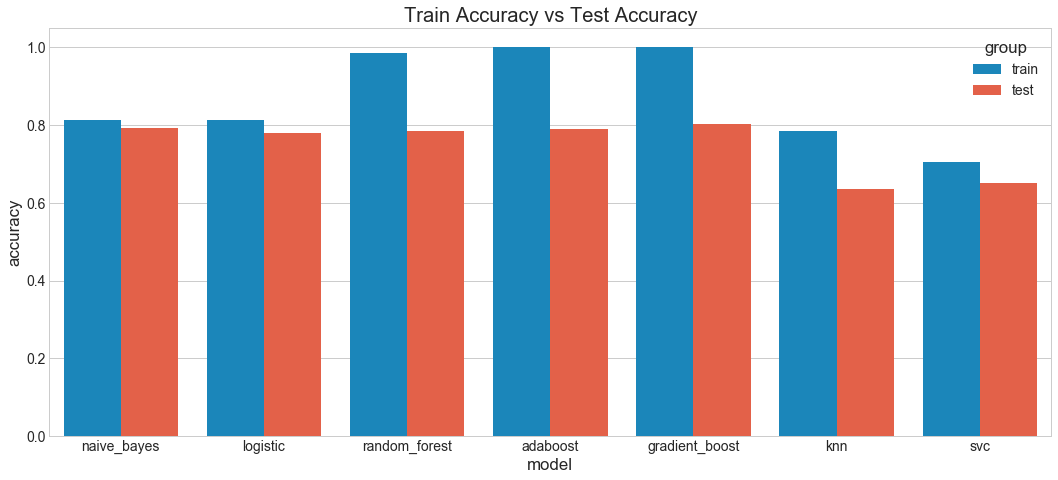

In [193]:
# Compare training and testing scores for accuracy
fig = plt.figure(figsize=(16,7))
sns.barplot(x='model', y='accuracy', data=baseline_avg_df, hue='group')
plt.title('Train Accuracy vs Test Accuracy')
plt.show()

The random forest, adaboost, and gradient boosting models display significant overfitting as their training scores averaged close to 100% accurate while their testing scores averaged closer to 80% accurate. This overfitting can be addressed with hyperparameter tuning/optimization. However, it is interesting to note that the naive bayes and logistic regression models achieved similar testing accuracy while displaying less overfitting. For this reason, it may be beneficial to include the naive bayes and logistic regression models instead of the random forest and adaboost models in subsequent iterations of model selection.

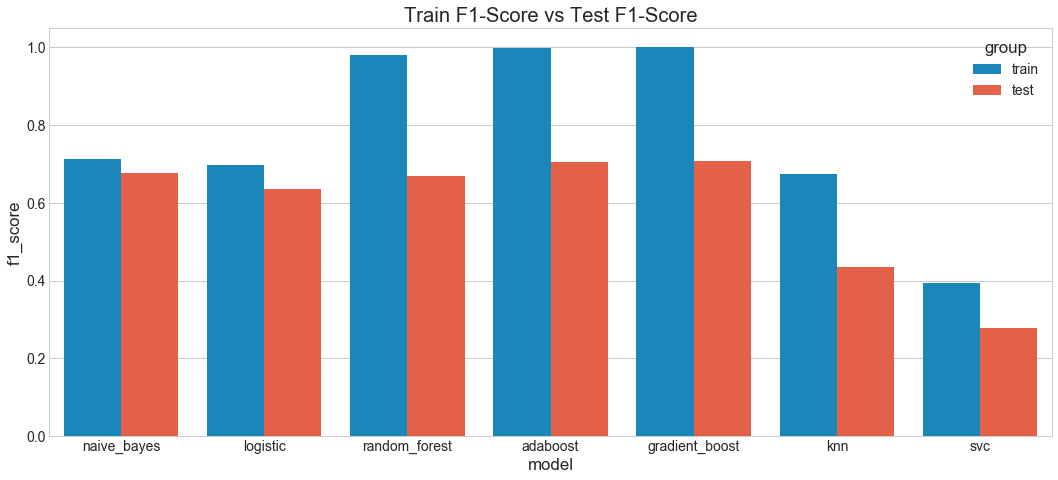

In [194]:
# Compare training and testing measures for F1-score

fig = plt.figure(figsize=(16,7))
sns.barplot(x='model', y='f1_score', data=baseline_avg_df, hue='group')
plt.title('Train F1-Score vs Test F1-Score')
plt.show()

Again, the training F1-scores for the random forest, adaboost, and gradient boosting models are significantly higher than their testing value, further indicating overfitting to the training data. Naive bayes (0.676) slightly outperfroms the random forest (0.668) model with much less overfitting. This finding strengthens the conclusion to have the naive bayes model progress to subsequent iterations of model selection instead of the random forest model.

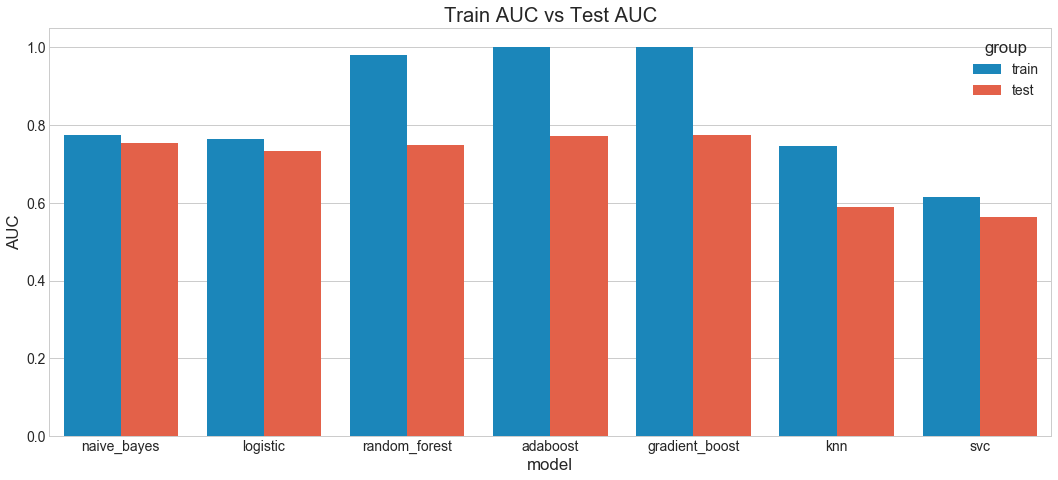

In [195]:
# Compare training and testing scores for AUC

fig = plt.figure(figsize=(16,7))
sns.barplot(x='model', y='AUC', data=baseline_avg_df, hue='group')
plt.title('Train AUC vs Test AUC')
plt.show()

Echoing the overfitting trends displayed in the figures for accuracy and F1-score, the random forest, adaboost, and gradient boosting models all have higher training AUC measures than their testing AUC measures. Additionally, the AUC measures for the naive bayes and logistic regression models are similar to the random forest model, but again with less overfitting. 

### Conclusion from Baseline Modeling

Based on analysis of the strength of each model's performance on the testing set and their evidence for overfitting, the gradient boosting, naive bayes, and logistic regression models will progress to subsequent iterations of model selection. Gradient boosting had the strongest performance of all the models, but it did display overfitting. Naive bayes and logistic regression performed similar to random forest and adaboost, but with less overfitting. The KNN and SVC models had the weakest performance across all measures.

## Model Tuning and Optimization

The naive bayes, logistic regression, and gradient boosting models will undergo hyperparameter tuning and optimization to limit overfitting and improve overall performance. They will again be evaluated based on accuracy, F1-score, and AUC.

In [74]:
import featuretools as ft

In [75]:
x2.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2
0,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
1,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
2,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
3,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
4,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [76]:
x2.describe()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.133187,29.962308,6.551648,26.199711,38.295837,28.167618,67.678997
std,0.392210,0.111098,3.169533,4.462372,70.610488,2.377764,16.786865
min,0.000000,29.630000,1.300000,7.077778,2.666667,18.242222,3.000000
25%,0.000000,29.900000,4.300000,23.229444,10.577778,26.837778,62.642248
50%,0.000000,29.965000,5.900000,26.625556,15.865278,28.471111,70.800000
75%,0.057500,30.040000,7.875000,29.510000,31.638889,30.073889,76.633333
max,3.500000,30.200000,16.600000,34.023077,640.000000,31.708889,110.311111


In [111]:
ft_test = data_raw.copy()
ft_test.head()

,X.2,Attack,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2
0,1,No,First quarter,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
1,2,No,Waxing gibbous,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
2,3,No,Full,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
3,4,No,Full,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
4,5,No,Full,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [112]:
ft_test.loc[(ft_test.Attack == 'No'), 'Attack'] = 0
ft_test.loc[(ft_test.Attack == 'Yes'), 'Attack'] = 1
print(ft_test.Attack.unique())
ft_test.head()

[0 1]


,X.2,Attack,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2
0,1,0,First quarter,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
1,2,0,Waxing gibbous,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
2,3,0,Full,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
3,4,0,Full,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
4,5,0,Full,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [113]:
target = ft_test.Attack

In [114]:
ft_test = ft_test.drop(['Attack', 'MoonPhase', 'MoonPhaseExtended'], axis=1)
ft_test.head()

,X.2,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2
0,1,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
1,2,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
2,3,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
3,4,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
4,5,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [115]:
es = ft.EntitySet(id = 'test1')
es.entity_from_dataframe(entity_id = 'raw1', 
                         dataframe = ft_test, 
                         index = 'X.2')
es.entity_from_dataframe(entity_id = 'raw2', 
                         dataframe = ft_test, 
                         index = 'X.2')

Entityset: test1
  Entities:
    raw1 [Rows: 182, Columns: 8]
    raw2 [Rows: 182, Columns: 8]
  Relationships:
    No relationships

In [116]:
# Create the relationships
relate = ft.Relationship(es['raw1']['X.2'], es['raw2']['X.2'])
es.add_relationship(relate)

es

Entityset: test1
  Entities:
    raw1 [Rows: 182, Columns: 8]
    raw2 [Rows: 182, Columns: 8]
  Relationships:
    raw2.X.2 -> raw1.X.2

In [124]:
# Deep Feature Synthesis
feature_matrix, feature_names = ft.dfs(entityset=es,
                                       target_entity='raw1',
                                       max_depth = 3, 
                                       verbose = 1, 
                                       n_jobs = -1)

Built 49 features
EntitySet scattered to workers in 1.574 seconds
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [125]:
all_features = [str(x.get_name()) for x in feature_names]
feature_matrix.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,SUM(raw2.Precipitation_Value),SUM(raw2.StationPressure),SUM(raw2.WindSpeed),...,MIN(raw2.Turbidity),MIN(raw2.Temperature),MIN(raw2.DissovedO2),MEAN(raw2.Precipitation_Value),MEAN(raw2.StationPressure),MEAN(raw2.WindSpeed),MEAN(raw2.Salinity),MEAN(raw2.Turbidity),MEAN(raw2.Temperature),MEAN(raw2.DissovedO2)
X.2,,,,,,,,,,,,,,,,,,,,,
1,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.00,29.96,6.4,...,23.422222,26.008889,82.555556,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
2,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.19,30.00,4.4,...,26.844444,24.673333,75.444444,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
3,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.00,29.92,7.5,...,20.266667,24.951111,78.511111,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
4,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.00,29.92,5.4,...,15.488889,25.995556,87.644444,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
5,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.00,29.98,7.2,...,44.733333,26.691111,91.244444,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [127]:
feature_matrix.isna().sum()

Precipitation_Value                 0
StationPressure                     0
WindSpeed                           0
Salinity                            0
Turbidity                           0
Temperature                         0
DissovedO2                          0
SUM(raw2.Precipitation_Value)       0
SUM(raw2.StationPressure)           0
SUM(raw2.WindSpeed)                 0
SUM(raw2.Salinity)                  0
SUM(raw2.Turbidity)                 0
SUM(raw2.Temperature)               0
SUM(raw2.DissovedO2)                0
STD(raw2.Precipitation_Value)     182
STD(raw2.StationPressure)         182
STD(raw2.WindSpeed)               182
STD(raw2.Salinity)                182
STD(raw2.Turbidity)               182
STD(raw2.Temperature)             182
STD(raw2.DissovedO2)              182
MAX(raw2.Precipitation_Value)       0
MAX(raw2.StationPressure)           0
MAX(raw2.WindSpeed)                 0
MAX(raw2.Salinity)                  0
MAX(raw2.Turbidity)                 0
MAX(raw2.Tem

In [128]:
feature_matrix = feature_matrix.dropna(axis=1)
feature_matrix.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,SUM(raw2.Precipitation_Value),SUM(raw2.StationPressure),SUM(raw2.WindSpeed),...,MIN(raw2.Turbidity),MIN(raw2.Temperature),MIN(raw2.DissovedO2),MEAN(raw2.Precipitation_Value),MEAN(raw2.StationPressure),MEAN(raw2.WindSpeed),MEAN(raw2.Salinity),MEAN(raw2.Turbidity),MEAN(raw2.Temperature),MEAN(raw2.DissovedO2)
X.2,,,,,,,,,,,,,,,,,,,,,
1,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.00,29.96,6.4,...,23.422222,26.008889,82.555556,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
2,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.19,30.00,4.4,...,26.844444,24.673333,75.444444,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
3,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.00,29.92,7.5,...,20.266667,24.951111,78.511111,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
4,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.00,29.92,5.4,...,15.488889,25.995556,87.644444,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
5,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.00,29.98,7.2,...,44.733333,26.691111,91.244444,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [126]:
all_features

['Precipitation_Value',
 'StationPressure',
 'WindSpeed',
 'Salinity',
 'Turbidity',
 'Temperature',
 'DissovedO2',
 'SUM(raw2.Precipitation_Value)',
 'SUM(raw2.StationPressure)',
 'SUM(raw2.WindSpeed)',
 'SUM(raw2.Salinity)',
 'SUM(raw2.Turbidity)',
 'SUM(raw2.Temperature)',
 'SUM(raw2.DissovedO2)',
 'STD(raw2.Precipitation_Value)',
 'STD(raw2.StationPressure)',
 'STD(raw2.WindSpeed)',
 'STD(raw2.Salinity)',
 'STD(raw2.Turbidity)',
 'STD(raw2.Temperature)',
 'STD(raw2.DissovedO2)',
 'MAX(raw2.Precipitation_Value)',
 'MAX(raw2.StationPressure)',
 'MAX(raw2.WindSpeed)',
 'MAX(raw2.Salinity)',
 'MAX(raw2.Turbidity)',
 'MAX(raw2.Temperature)',
 'MAX(raw2.DissovedO2)',
 'SKEW(raw2.Precipitation_Value)',
 'SKEW(raw2.StationPressure)',
 'SKEW(raw2.WindSpeed)',
 'SKEW(raw2.Salinity)',
 'SKEW(raw2.Turbidity)',
 'SKEW(raw2.Temperature)',
 'SKEW(raw2.DissovedO2)',
 'MIN(raw2.Precipitation_Value)',
 'MIN(raw2.StationPressure)',
 'MIN(raw2.WindSpeed)',
 'MIN(raw2.Salinity)',
 'MIN(raw2.Turbidity)'

In [120]:
# Create correlation matrix
corr_matrix = feature_matrix.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.99)]

print('There are {} columns with >= 0.99 correlation.'.format(len(to_drop)))
to_drop

There are 28 columns with >= 0.99 correlation.


['SUM(raw2.Precipitation_Value)',
 'SUM(raw2.StationPressure)',
 'SUM(raw2.WindSpeed)',
 'SUM(raw2.Salinity)',
 'SUM(raw2.Turbidity)',
 'SUM(raw2.Temperature)',
 'SUM(raw2.DissovedO2)',
 'MAX(raw2.Precipitation_Value)',
 'MAX(raw2.StationPressure)',
 'MAX(raw2.WindSpeed)',
 'MAX(raw2.Salinity)',
 'MAX(raw2.Turbidity)',
 'MAX(raw2.Temperature)',
 'MAX(raw2.DissovedO2)',
 'MIN(raw2.Precipitation_Value)',
 'MIN(raw2.StationPressure)',
 'MIN(raw2.WindSpeed)',
 'MIN(raw2.Salinity)',
 'MIN(raw2.Turbidity)',
 'MIN(raw2.Temperature)',
 'MIN(raw2.DissovedO2)',
 'MEAN(raw2.Precipitation_Value)',
 'MEAN(raw2.StationPressure)',
 'MEAN(raw2.WindSpeed)',
 'MEAN(raw2.Salinity)',
 'MEAN(raw2.Turbidity)',
 'MEAN(raw2.Temperature)',
 'MEAN(raw2.DissovedO2)']

In [121]:
feature_matrix = feature_matrix[[x for x in feature_matrix if x not in to_drop]]

In [123]:
feature_matrix.isna().sum()

Precipitation_Value                 0
StationPressure                     0
WindSpeed                           0
Salinity                            0
Turbidity                           0
Temperature                         0
DissovedO2                          0
STD(raw2.Precipitation_Value)     182
STD(raw2.StationPressure)         182
STD(raw2.WindSpeed)               182
STD(raw2.Salinity)                182
STD(raw2.Turbidity)               182
STD(raw2.Temperature)             182
STD(raw2.DissovedO2)              182
SKEW(raw2.Precipitation_Value)    182
SKEW(raw2.StationPressure)        182
SKEW(raw2.WindSpeed)              182
SKEW(raw2.Salinity)               182
SKEW(raw2.Turbidity)              182
SKEW(raw2.Temperature)            182
SKEW(raw2.DissovedO2)             182
dtype: int64

In [130]:
es = ft.EntitySet(id = 'test2')
es.entity_from_dataframe(entity_id = 'raw', 
                         dataframe = ft_test, 
                         index = 'X.2')

Entityset: test2
  Entities:
    raw [Rows: 182, Columns: 8]
  Relationships:
    No relationships

In [131]:
es.normalize_entity(base_entity_id='raw', 
                    new_entity_id='raw_norm', 
                    index = 'X.2')
es

Entityset: test2
  Entities:
    raw [Rows: 182, Columns: 8]
    raw_norm [Rows: 182, Columns: 1]
  Relationships:
    raw.X.2 -> raw_norm.X.2

In [132]:
# Deep Feature Synthesis
feature_matrix, feature_names = ft.dfs(entityset=es,
                                       target_entity='raw',
                                       max_depth = 3, 
                                       verbose = True, 
                                       n_jobs = -1)

Built 49 features
EntitySet scattered to workers in 1.628 seconds
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [133]:
all_features = [str(x.get_name()) for x in feature_names]
feature_matrix.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,raw_norm.SUM(raw.Precipitation_Value),raw_norm.SUM(raw.StationPressure),raw_norm.SUM(raw.WindSpeed),...,raw_norm.MIN(raw.Turbidity),raw_norm.MIN(raw.Temperature),raw_norm.MIN(raw.DissovedO2),raw_norm.MEAN(raw.Precipitation_Value),raw_norm.MEAN(raw.StationPressure),raw_norm.MEAN(raw.WindSpeed),raw_norm.MEAN(raw.Salinity),raw_norm.MEAN(raw.Turbidity),raw_norm.MEAN(raw.Temperature),raw_norm.MEAN(raw.DissovedO2)
X.2,,,,,,,,,,,,,,,,,,,,,
1,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.00,29.96,6.4,...,23.422222,26.008889,82.555556,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556
2,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.19,30.00,4.4,...,26.844444,24.673333,75.444444,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444
3,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.00,29.92,7.5,...,20.266667,24.951111,78.511111,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111
4,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.00,29.92,5.4,...,15.488889,25.995556,87.644444,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444
5,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.00,29.98,7.2,...,44.733333,26.691111,91.244444,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444


In [160]:
test1 = pd.DataFrame(list(range(0,27)))
test2 = pd.DataFrame(list(np.random.normal(3,5,27)))
test3 = pd.DataFrame(list(np.random.normal(2,6,27)))
test4 = pd.DataFrame(list(np.random.normal(1,4,27)))
a_vals = pd.concat([test1,test2,test3,test4], axis=1)
a_vals.columns = ['id_1', 'feature_1', 'feature_2', 'feature_3']
a_vals.head()
# a = pd.DataFrame(a_vals, columns=['id_1', 'feature_1', 'feature_2', 'feature_3'])
# a.head()

,id_1,feature_1,feature_2,feature_3
0,0,3.575914,11.605245,-1.383500
1,1,7.786828,-8.599849,-4.794402
2,2,8.493551,-4.651412,0.810937
3,3,3.793781,-1.954862,-0.424732
4,4,4.586456,6.778380,-0.429188


In [161]:
test1 = pd.DataFrame(list(range(0,27)))
test2 = pd.DataFrame(list(np.random.normal(1,2,27)))
test3 = pd.DataFrame(list(np.random.normal(2,1,27)))
test4 = pd.DataFrame(list(np.random.normal(3,4,27)))
b_vals = pd.concat([test1,test2,test3,test4], axis=1)
b_vals.columns = ['id_2', 'feature_a', 'feature_b', 'feature_c']
b_vals.head()

,id_2,feature_a,feature_b,feature_c
0,0,-0.403382,2.547690,2.570069
1,1,-0.008833,1.568727,8.025109
2,2,0.226829,4.599408,-5.604052
3,3,-0.240256,0.655555,3.203800
4,4,4.552893,1.908055,1.681282


In [162]:
test1 = pd.DataFrame(list(range(0,27)))
test2 = pd.DataFrame(list(np.random.normal(1,2,27)))
test3 = pd.DataFrame(list(np.random.normal(2,1,27)))
test4 = pd.DataFrame(list(np.random.normal(3,4,27)))
c_vals = pd.concat([test1,test2,test3,test4], axis=1)
c_vals.columns = ['id_3', 'feature_x', 'feature_y', 'feature_z']
c_vals.head()

,id_3,feature_x,feature_y,feature_z
0,0,3.089049,2.986356,4.792806
1,1,1.826606,2.397190,-1.834298
2,2,4.043384,1.561233,7.808497
3,3,1.344552,0.596218,5.236397
4,4,2.893771,2.452087,9.691515


In [188]:
es = ft.EntitySet(id = 'example')
es.entity_from_dataframe(entity_id = 'entity_1', 
                         dataframe = a_vals, 
                         index = 'id_1')
es.entity_from_dataframe(entity_id = 'entity_2', 
                         dataframe = b_vals, 
                         index = 'id_2')
es.entity_from_dataframe(entity_id = 'entity_3', 
                         dataframe = c_vals, 
                         index = 'id_3')

Entityset: example
  Entities:
    entity_1 [Rows: 27, Columns: 4]
    entity_2 [Rows: 27, Columns: 4]
    entity_3 [Rows: 27, Columns: 4]
  Relationships:
    No relationships

In [189]:
# Create the relationships
relate1 = ft.Relationship(es['entity_1']['id_1'], es['entity_2']['id_2'])
es.add_relationship(relate1)
# Create the relationships
relate2 = ft.Relationship(es['entity_3']['id_3'], es['entity_2']['id_2'])
es.add_relationship(relate2)

es

Entityset: example
  Entities:
    entity_1 [Rows: 27, Columns: 4]
    entity_2 [Rows: 27, Columns: 4]
    entity_3 [Rows: 27, Columns: 4]
  Relationships:
    entity_2.id_2 -> entity_1.id_1
    entity_2.id_2 -> entity_3.id_3

In [191]:
# Deep Feature Synthesis
feature_matrix, feature_names = ft.dfs(entityset=es,
                                       target_entity='entity_1',
                                       max_depth = 3, 
                                       verbose = True, 
                                       n_jobs = -1)

Built 147 features
EntitySet scattered to workers in 0.996 seconds


Elapsed: 00:00 | Remaining: ? | Progress:   0%|          | Calculated: 0/3 chunks

Elapsed: 00:00 | Remaining: 00:00 | Progress:  33%|███▎      | Calculated: 1/3 chunks

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 3/3 chunks

In [179]:
all_features = [str(x.get_name()) for x in feature_names]
feature_matrix.head()

,feature_1,feature_2,feature_3,SUM(table_2.feature_a),SUM(table_2.feature_b),SUM(table_2.feature_c),STD(table_2.feature_a),STD(table_2.feature_b),STD(table_2.feature_c),MAX(table_2.feature_a),...,MEAN(table_2.table_3.MAX(table_2.feature_c)),MEAN(table_2.table_3.SKEW(table_2.feature_a)),MEAN(table_2.table_3.SKEW(table_2.feature_b)),MEAN(table_2.table_3.SKEW(table_2.feature_c)),MEAN(table_2.table_3.MIN(table_2.feature_a)),MEAN(table_2.table_3.MIN(table_2.feature_b)),MEAN(table_2.table_3.MIN(table_2.feature_c)),MEAN(table_2.table_3.MEAN(table_2.feature_a)),MEAN(table_2.table_3.MEAN(table_2.feature_b)),MEAN(table_2.table_3.MEAN(table_2.feature_c))
id_1,,,,,,,,,,,,,,,,,,,,,
0,3.575914,11.605245,-1.383500,-0.403382,2.547690,2.570069,NaN,NaN,NaN,-0.403382,...,2.570069,NaN,NaN,NaN,-0.403382,2.547690,2.570069,-0.403382,2.547690,2.570069
1,7.786828,-8.599849,-4.794402,-0.008833,1.568727,8.025109,NaN,NaN,NaN,-0.008833,...,8.025109,NaN,NaN,NaN,-0.008833,1.568727,8.025109,-0.008833,1.568727,8.025109
2,8.493551,-4.651412,0.810937,0.226829,4.599408,-5.604052,NaN,NaN,NaN,0.226829,...,-5.604052,NaN,NaN,NaN,0.226829,4.599408,-5.604052,0.226829,4.599408,-5.604052
3,3.793781,-1.954862,-0.424732,-0.240256,0.655555,3.203800,NaN,NaN,NaN,-0.240256,...,3.203800,NaN,NaN,NaN,-0.240256,0.655555,3.203800,-0.240256,0.655555,3.203800
4,4.586456,6.778380,-0.429188,4.552893,1.908055,1.681282,NaN,NaN,NaN,4.552893,...,1.681282,NaN,NaN,NaN,4.552893,1.908055,1.681282,4.552893,1.908055,1.681282


In [192]:
all_features[-35:]

['MIN(table_2.table_3.SUM(table_2.feature_b))',
 'MIN(table_2.table_3.SUM(table_2.feature_c))',
 'MIN(table_2.table_3.STD(table_2.feature_a))',
 'MIN(table_2.table_3.STD(table_2.feature_b))',
 'MIN(table_2.table_3.STD(table_2.feature_c))',
 'MIN(table_2.table_3.MAX(table_2.feature_a))',
 'MIN(table_2.table_3.MAX(table_2.feature_b))',
 'MIN(table_2.table_3.MAX(table_2.feature_c))',
 'MIN(table_2.table_3.SKEW(table_2.feature_a))',
 'MIN(table_2.table_3.SKEW(table_2.feature_b))',
 'MIN(table_2.table_3.SKEW(table_2.feature_c))',
 'MIN(table_2.table_3.MIN(table_2.feature_a))',
 'MIN(table_2.table_3.MIN(table_2.feature_b))',
 'MIN(table_2.table_3.MIN(table_2.feature_c))',
 'MIN(table_2.table_3.MEAN(table_2.feature_a))',
 'MIN(table_2.table_3.MEAN(table_2.feature_b))',
 'MIN(table_2.table_3.MEAN(table_2.feature_c))',
 'MEAN(table_2.table_3.SUM(table_2.feature_a))',
 'MEAN(table_2.table_3.SUM(table_2.feature_b))',
 'MEAN(table_2.table_3.SUM(table_2.feature_c))',
 'MEAN(table_2.table_3.STD(tabl

distributed.core - INFO - Event loop was unresponsive in Nanny for 847.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 847.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 847.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 179.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 179.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 413.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 413.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 413.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 413.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 413.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.13s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 13.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 13.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 13.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data

distributed.core - INFO - Event loop was unresponsive in Nanny for 108.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 108.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 291.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 291.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 291.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 7.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 34.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.49s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2363.54s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.59s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1798.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of dat

distributed.core - INFO - Event loop was unresponsive in Nanny for 42.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 42.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 412.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 412.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 412.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 21.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 21.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 21.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 8.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 8.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1868.97s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 241.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 241.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 241.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 295.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 295.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 295.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 295.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 295.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 423.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 423.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 423.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 2195.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2195.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2195.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2195.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2195.98s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.44s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2061.48s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.46s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2044.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1911.53s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.46s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2014.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2067.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2067.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2067.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2067.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2067.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2038.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1862.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1862.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1862.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1862.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1862.49s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.64s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2365.67s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.49s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2081.53s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1887.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1887.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1887.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1887.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1887.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.49s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2263.53s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1918.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1918.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1918.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1918.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1918.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.45s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1842.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 283.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 283.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 283.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 283.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 283.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.12s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1976.16s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 4.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 4.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 1904.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1904.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1904.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1904.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1904.31s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1587.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2114.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2114.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2114.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2114.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2114.33s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 71.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 71.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 71.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.60s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2237.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.45s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1881.49s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.45s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1932.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2241.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2241.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2241.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2241.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2241.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.46s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1991.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 403.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 403.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 403.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 403.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 403.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 989.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 989.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 989.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 989.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 989.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 990.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 990.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 990.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 990.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 990.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 2260.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2259.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2259.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2260.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2260.00s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2260.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2260.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of 

distributed.core - INFO - Event loop was unresponsive in Nanny for 584.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 584.86s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.25s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2150.30s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2140.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2140.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2140.97s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2140.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2140.97s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2121.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 196.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 196.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 196.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 196.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 196.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 179.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 179.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This

distributed.core - INFO - Event loop was unresponsive in Nanny for 20.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 20.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 365.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 365.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 365.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 8.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.22s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.28s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2318.29s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 386.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 386.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 386.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 386.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 386.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.76s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.77s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.77s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.76s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.82s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2001.81s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2005.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2174.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.43s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2273.48s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 8.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 8.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.25s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2188.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2188.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2188.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2188.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2188.92s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.60s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1830.65s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.17s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1794.21s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 17.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 17.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 17.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 17.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 17.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 7.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 7.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 7.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2180.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2180.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2180.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2180.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2180.94s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.45s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2298.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.48s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1929.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data.

distributed.core - INFO - Event loop was unresponsive in Nanny for 34.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 34.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.69s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1949.74s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 33.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 33.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.06s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.05s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2338.11s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2172.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2172.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2172.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2172.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2172.20s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 138.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 138.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 138.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 66.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 66.77s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 66.77s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of d

distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1960.31s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 31.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 31.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 31.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 15.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.32s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.29s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.31s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.30s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2042.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2042.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2042.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2042.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2042.59s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 634.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 634.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.64s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 634.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 387.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 387.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 387.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data

distributed.core - INFO - Event loop was unresponsive in Nanny for 39.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 39.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.19s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.24s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2171.25s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1890.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1890.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1890.33s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1890.34s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1890.35s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1893.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 4.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 4.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.69s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 4.70s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.39s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2384.44s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 49 memory: 315 MB fds: 164>>
Traceback (most rece

distributed.core - INFO - Event loop was unresponsive in Nanny for 10.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.11s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 10.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.62s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.63s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 1939.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1939.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1939.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1939.19s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1939.20s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.20s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.21s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 15.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 15.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.22s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 35.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.26s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 35.27s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.00s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.00s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.04s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.05s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2270.05s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 225.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 225.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 225.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 225.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 225.02s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 73.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.91s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 73.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.96s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 73.95s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 9.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 9.14s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 30.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 30.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 30.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 3.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.92s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.93s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2377.93s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1821.53s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1999.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1999.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1999.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1999.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1999.50s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2157.53s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2063.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2063.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2063.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2063.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2063.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.46s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2308.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1730.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 77.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of

distributed.core - INFO - Event loop was unresponsive in Nanny for 77.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 77.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 77.65s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 77.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 77.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.73s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.77s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.78s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.78s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.78s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2388.78s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2018.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2018.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2018.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2018.75s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2018.75s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.45s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.46s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2011.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1953.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1953.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1953.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1953.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1953.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.47s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.51s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1804.52s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.50s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.51s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.54s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2109.55s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 107.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 107.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 107.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 107.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 107.12s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.47s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.48s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 32.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 32.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 2027.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2027.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2027.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2027.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 2027.38s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 535.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.52s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.53s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 535.58s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.57s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 535.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of da

distributed.core - INFO - Event loop was unresponsive in Nanny for 98.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 98.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 98.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 98.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 98.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 11.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.66s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.68s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 11.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 11.71s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.37s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.38s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 5.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.42s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 5.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 6.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.73s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 6.74s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This c

distributed.core - INFO - Event loop was unresponsive in Nanny for 15.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.78s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.79s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 15.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 15.84s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. T

distributed.core - INFO - Event loop was unresponsive in Nanny for 1306.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1306.39s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1306.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1306.41s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1306.40s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.88s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.89s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.88s.  This is often caused by long-running GIL-holding functions or moving large chunks 

distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 3549.95s.  This is often caused by long-running GIL-holding functions or moving large chunks 

In [186]:
ft.primitives.list_primitives()[:10]

,name,type,description
0,num_unique,aggregation,"Determines the number of distinct values, igno..."
1,std,aggregation,Computes the dispersion relative to the mean v...
2,max,aggregation,"Calculates the highest value, ignoring `NaN` v..."
3,avg_time_between,aggregation,Computes the average number of seconds between...
4,skew,aggregation,Computes the extent to which a distribution di...
5,time_since_last,aggregation,Calculates the time elapsed since the last dat...
6,min,aggregation,"Calculates the smallest value, ignoring `NaN` ..."
7,sum,aggregation,"Calculates the total addition, ignoring `NaN`."
8,count,aggregation,"Determines the total number of values, excludi..."
9,median,aggregation,Determines the middlemost number in a list of ...


In [69]:
x1 = pd.get_dummies(x1)
x1.head()

,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,MoonPhaseExtended_First quarter,MoonPhaseExtended_Full,MoonPhaseExtended_New,...,MoonPhaseExtended_Waxing crescent,MoonPhaseExtended_Waxing gibbous,MoonPhase_First quarter,MoonPhase_Full,MoonPhase_New,MoonPhase_Third quarter,MoonPhase_Waning crescent,MoonPhase_Waning gibbous,MoonPhase_Waxing crescent,MoonPhase_Waxing gibbous
0,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0,1,0,...,0,0,0,1,0,0,0,0,0,0
